
GEOCHEMICAL ANALYSIS SUMMARY

Sample Statistics (n = 30):
------------------------------
SiO2: 70.49 ± 7.20 wt%
Al2O3: 14.64 ± 2.79 wt%
Fe2O3: 5.04 ± 1.94 wt%
MgO: 1.98 ± 0.91 wt%
CaO: 2.86 ± 1.54 wt%
Na2O: 3.28 ± 0.95 wt%
K2O: 3.60 ± 1.58 wt%
TiO2: 0.81 ± 0.31 wt%

Weathering Indices:
--------------------
CIA: 60.2 ± 6.8
CIA Range: 46.3 - 75.7
Weathering Interpretation: Moderate chemical weathering

Generating geochemical plots...
Generating Plot 1: SiO2 vs Alkali Classification...
Generating Plot 2: Tectonic Setting Discrimination...


C:\Users\venka\AppData\Local\Temp\ipykernel_27988\419625371.py:86: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\venka\AppData\Local\Temp\ipykernel_27988\419625371.py:86: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\venka\AppData\Local\Temp\ipykernel_27988\419625371.py:120: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()


Generating Plot 3: Sandstone Classification...
Generating Plot 4-8: Stratigraphic Profiles...


C:\Users\venka\AppData\Local\Temp\ipykernel_27988\419625371.py:163: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\venka\AppData\Local\Temp\ipykernel_27988\419625371.py:163: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Arial.
  plt.tight_layout()


Generating Plot 9: CIA Analysis...
Generating Plot 10: A-CN-K Ternary...

Analysis complete! Generated 6 plots.

To display plots, run: plt.show()
To save plots individually, use: fig.savefig('plot_name.png', dpi=300, bbox_inches='tight')


C:\Users\venka\AppData\Local\Temp\ipykernel_27988\419625371.py:301: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\venka\AppData\Local\Temp\ipykernel_27988\419625371.py:301: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\venka\anaconda2024\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\venka\anaconda2024\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\venka\anaconda2024\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\venka\anaconda2024\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s)

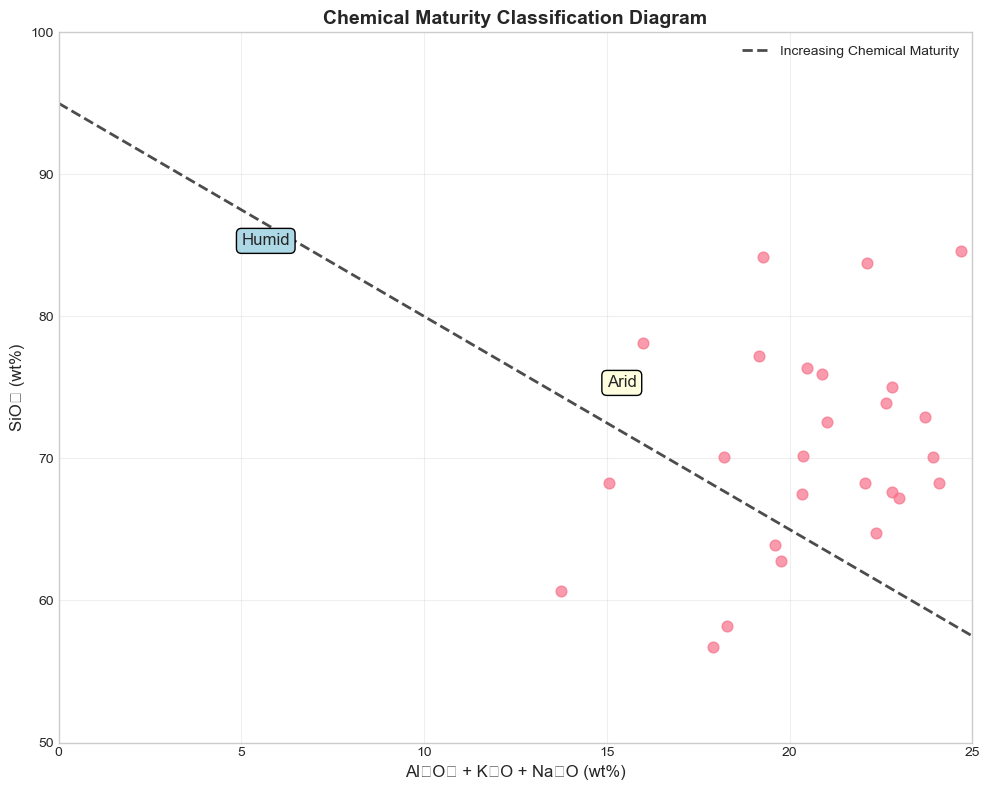

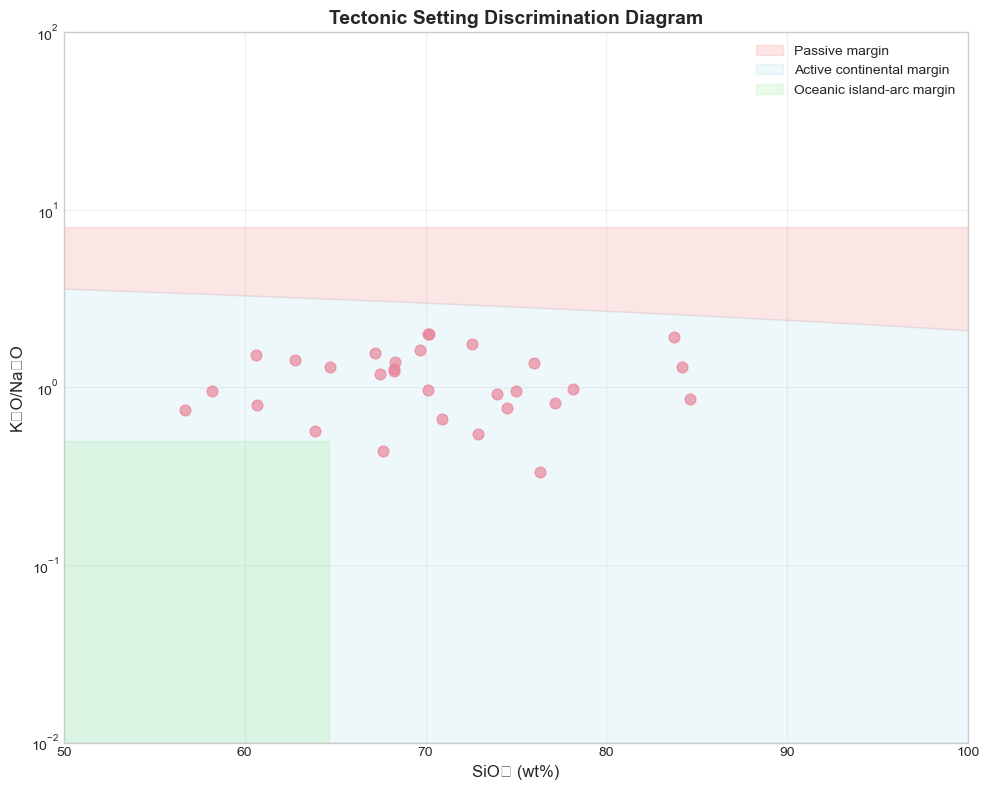

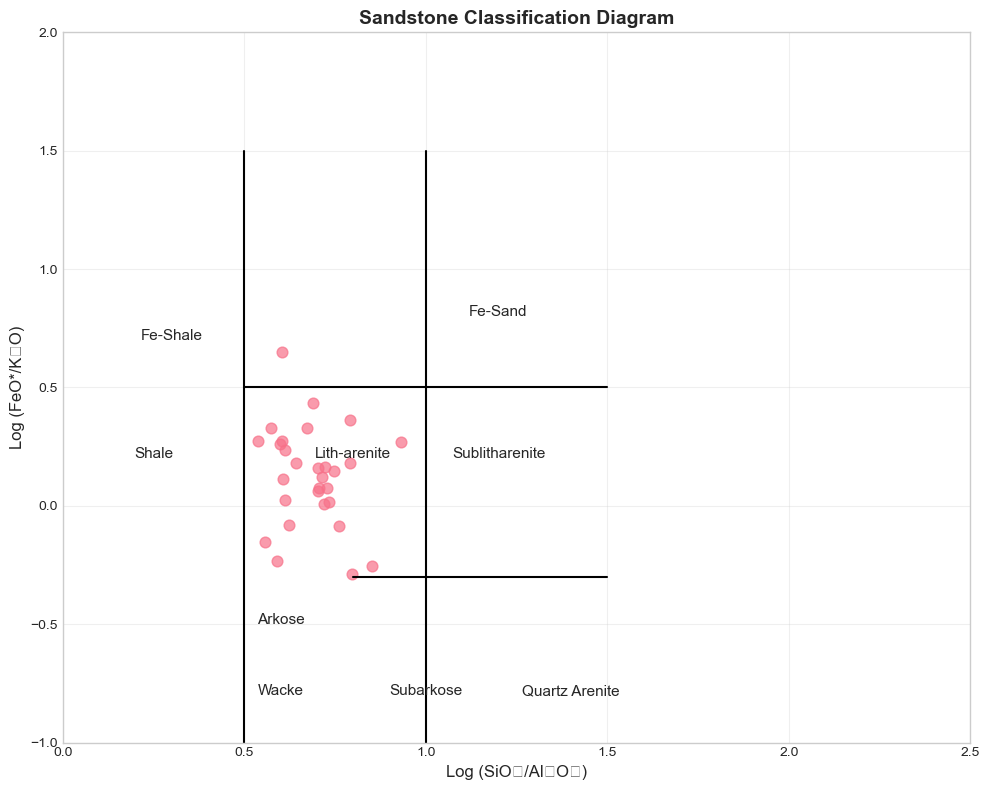

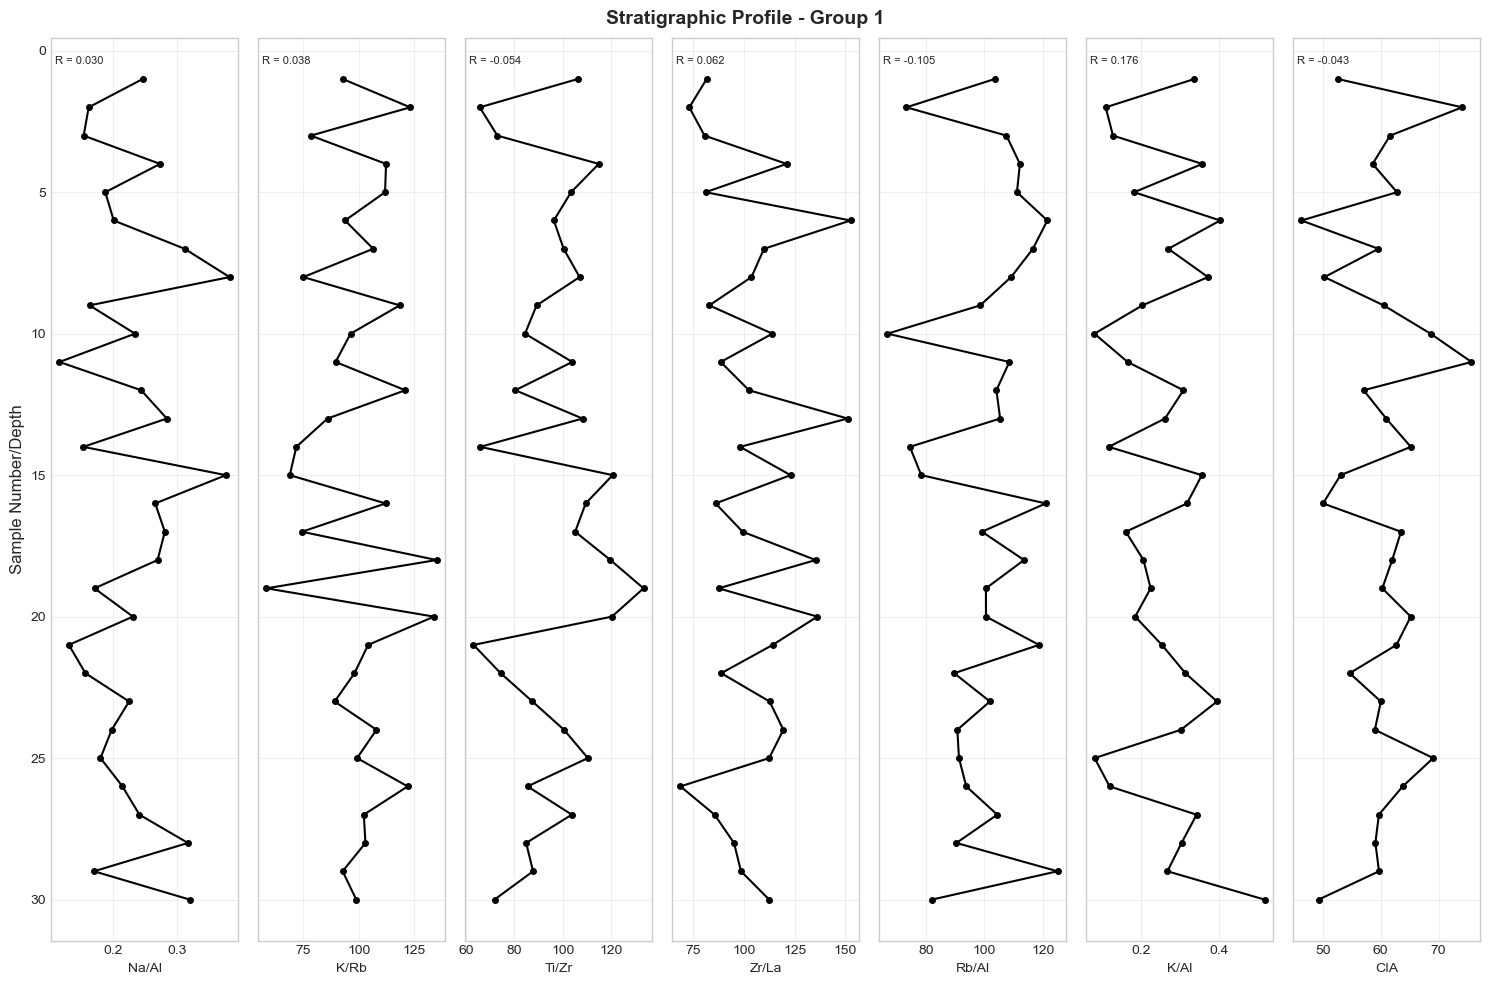

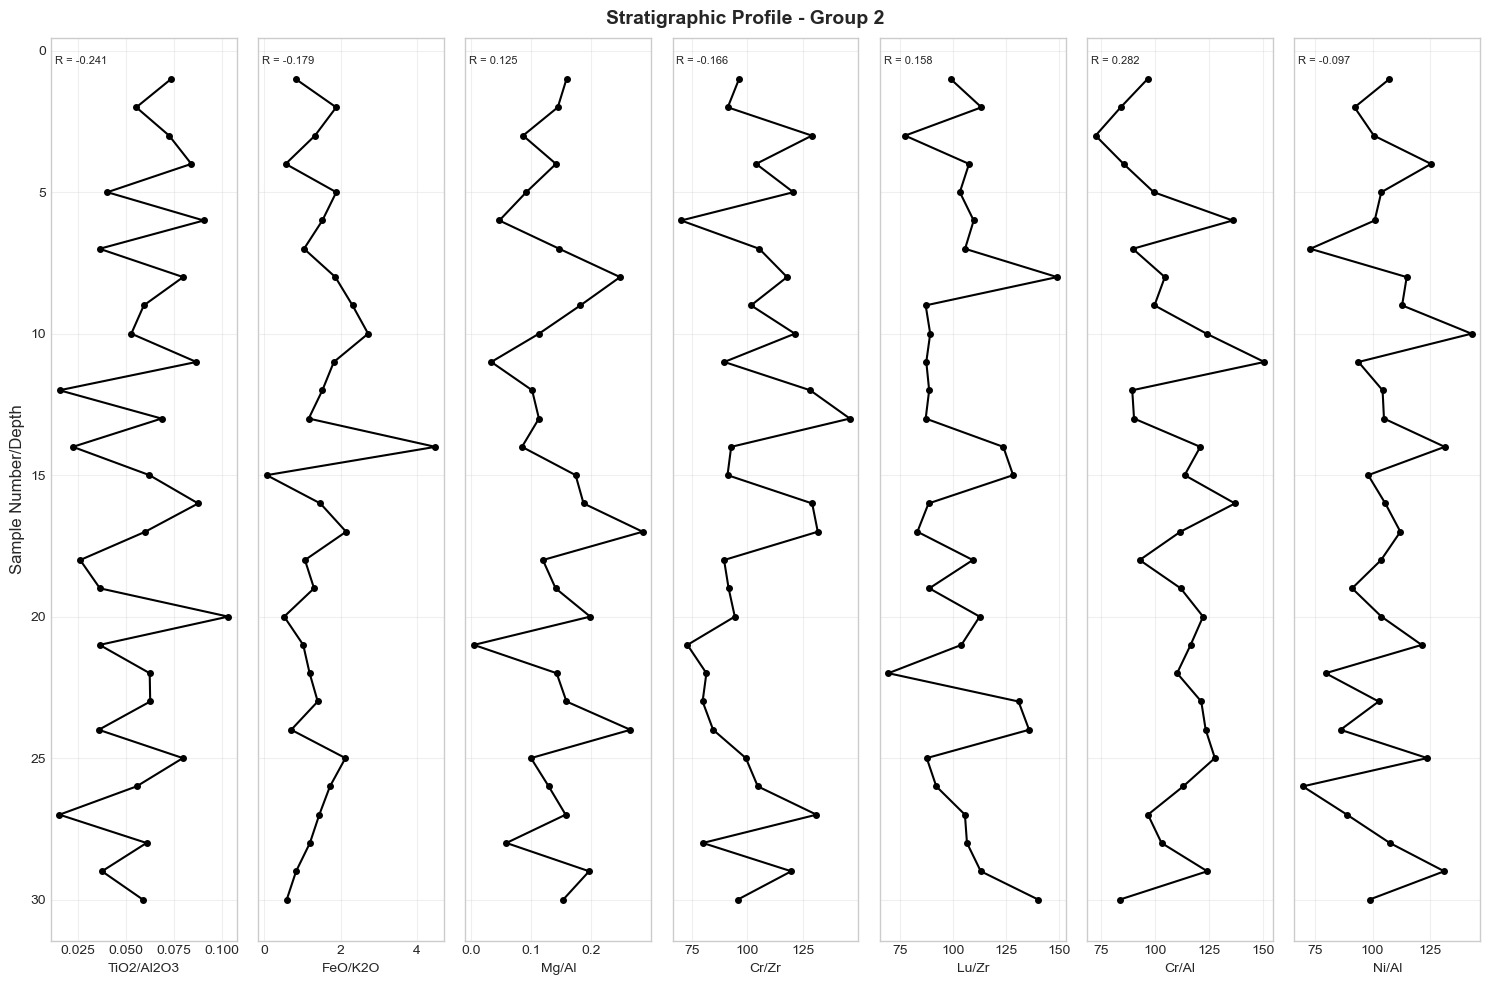

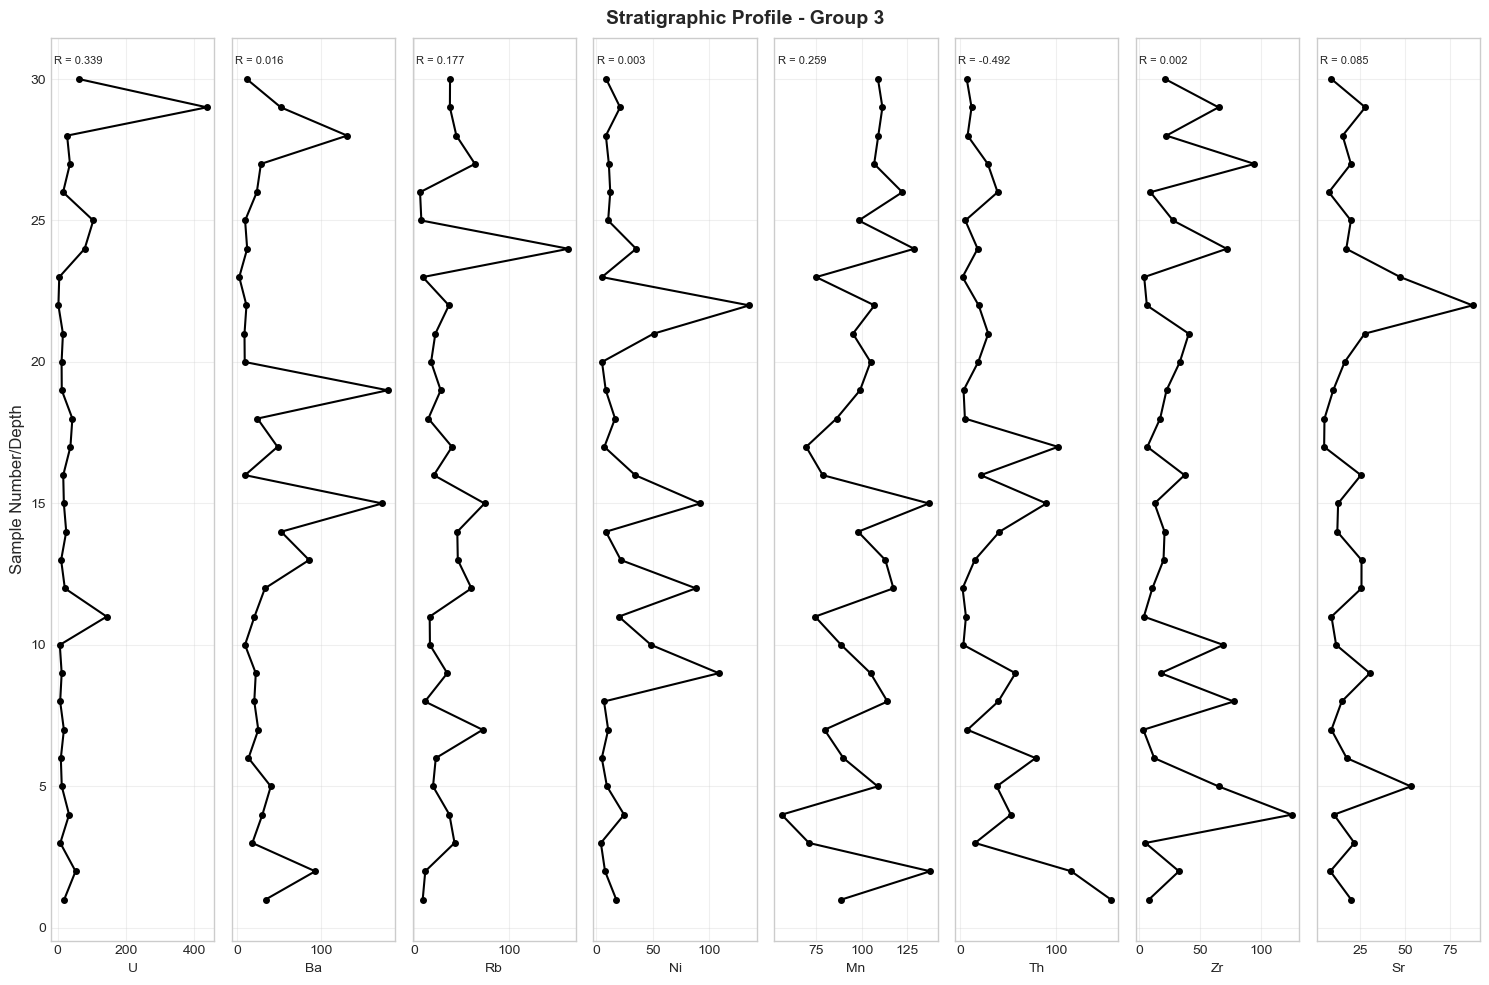

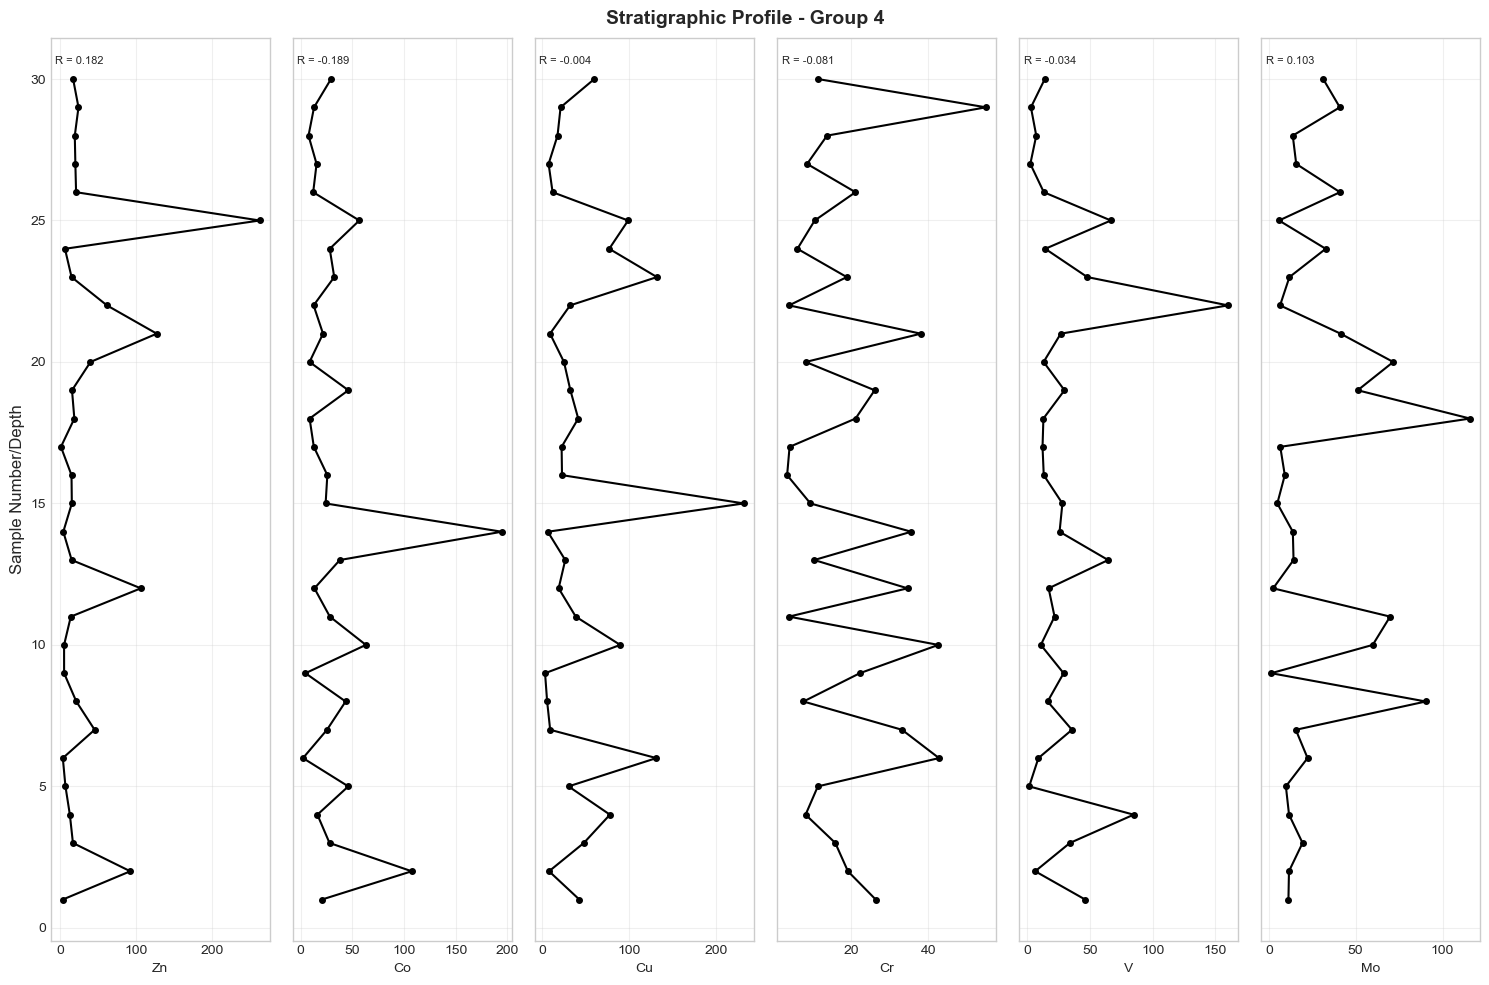

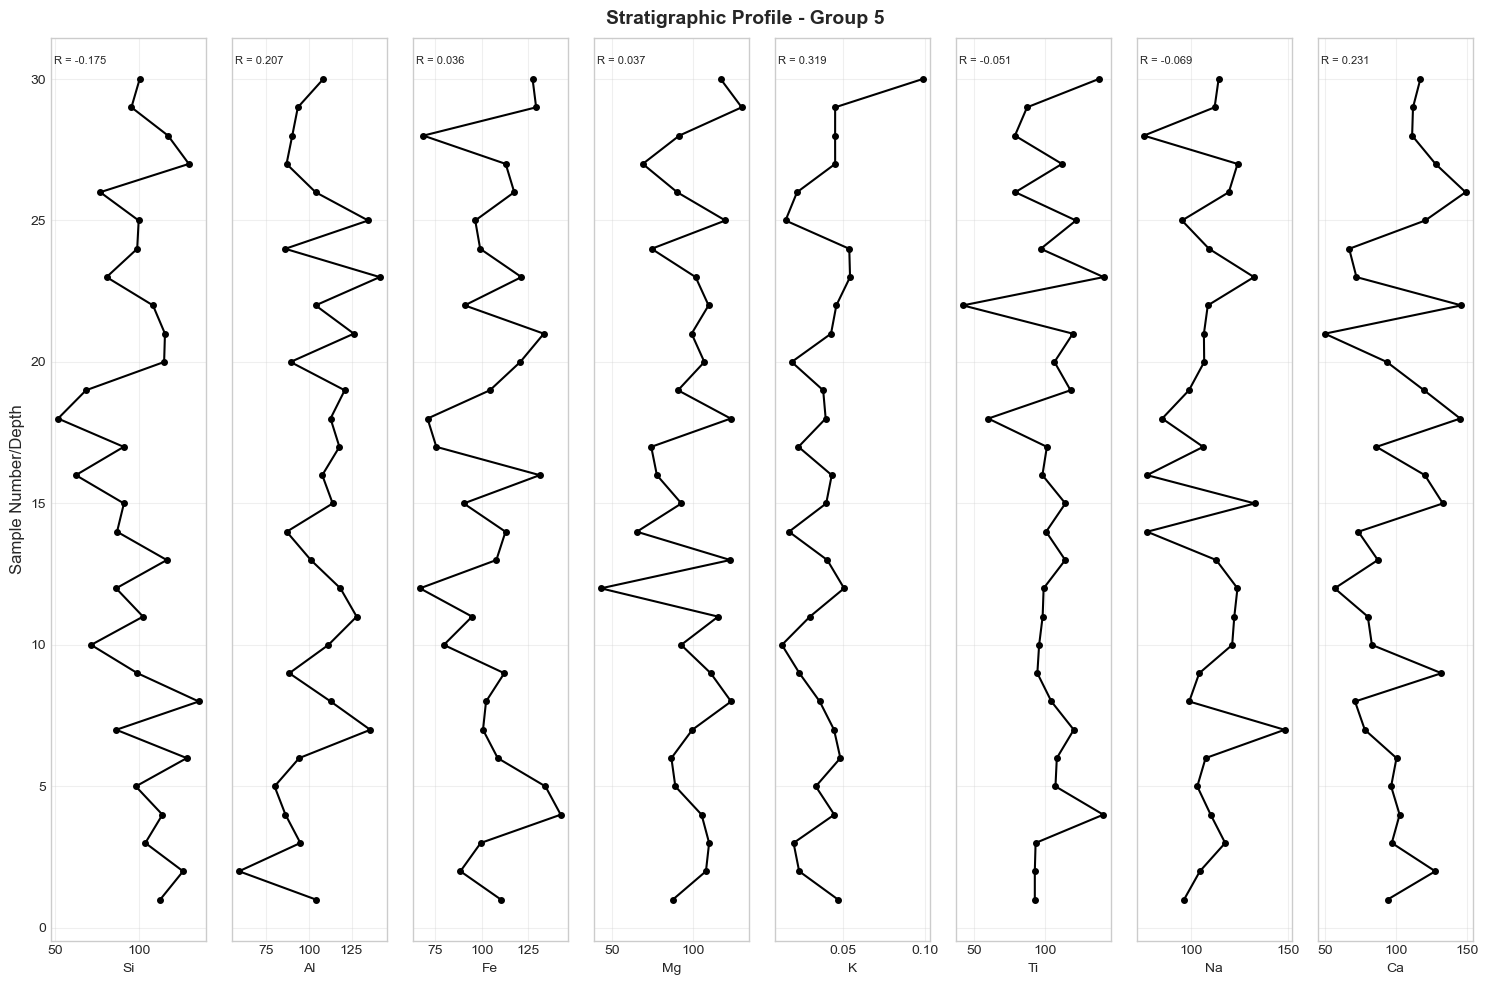

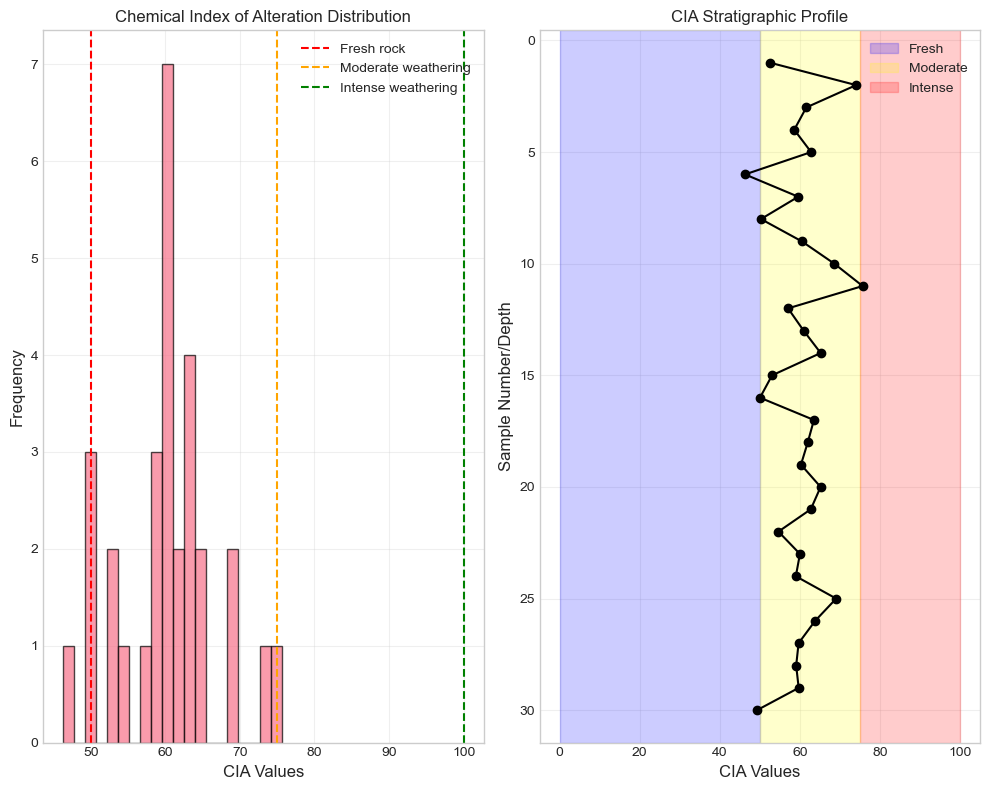

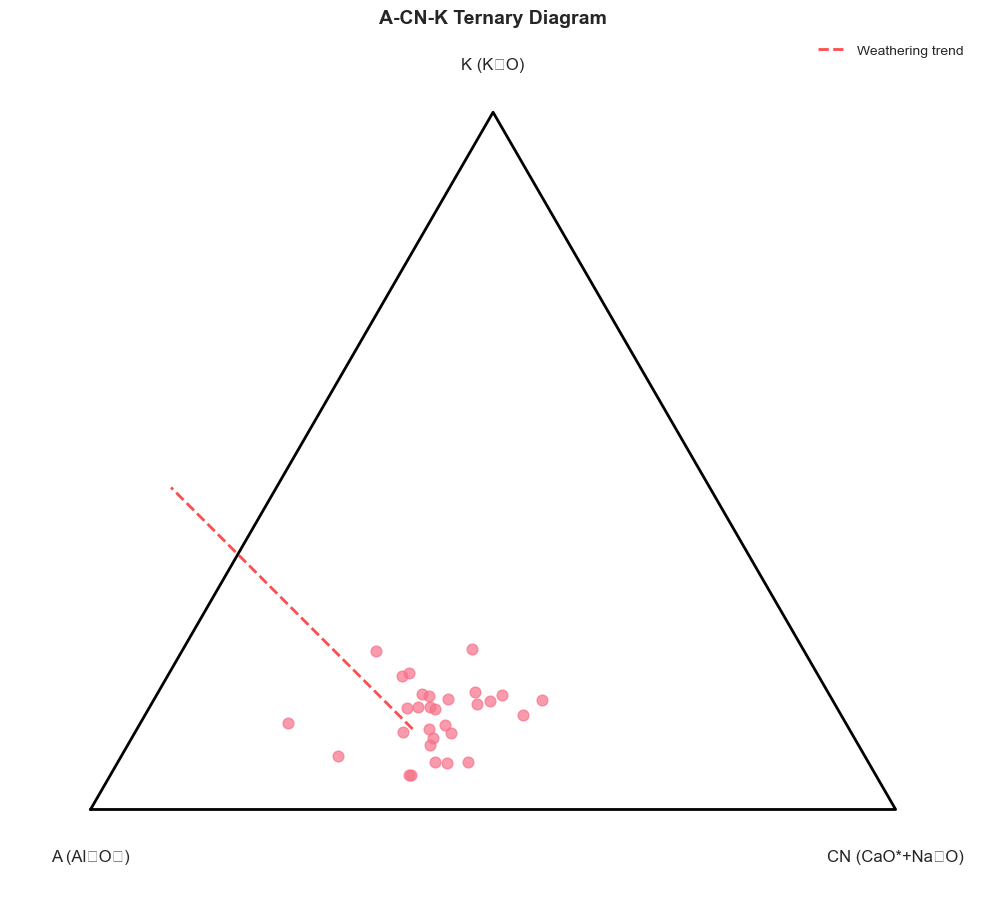

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

class GeochemicalAnalysis:
    def __init__(self, data):
        """
        Initialize with XRF dataset containing oxide percentages
        Expected columns: SiO2, Al2O3, Fe2O3, MgO, CaO, Na2O, K2O, TiO2, etc.
        """
        self.data = data.copy()
        self.calculate_indices()
    
    def calculate_indices(self):
        """Calculate weathering and classification indices"""
        
        # Calculate CaO* (CaO corrected for carbonate contribution)
        # Assuming minimal carbonate, CaO* ≈ CaO for silicate analysis
        self.data['CaO_corrected'] = self.data['CaO']
        
        # Chemical Index of Alteration (CIA)
        self.data['CIA'] = (self.data['Al2O3'] / 
                           (self.data['Al2O3'] + self.data['CaO_corrected'] + 
                            self.data['Na2O'] + self.data['K2O'])) * 100
        
        # A-CN-K ternary components (molecular proportions)
        self.data['A'] = self.data['Al2O3'] / 101.96  # Al2O3 molecular weight
        self.data['CN'] = (self.data['CaO_corrected']/56.08 + self.data['Na2O']/61.98)
        self.data['K'] = self.data['K2O'] / 94.20
        
        # Normalize for ternary plot
        total_ACN_K = self.data['A'] + self.data['CN'] + self.data['K']
        self.data['A_norm'] = self.data['A'] / total_ACN_K * 100
        self.data['CN_norm'] = self.data['CN'] / total_ACN_K * 100
        self.data['K_norm'] = self.data['K'] / total_ACN_K * 100
        
        # A-CNK-FM ternary components
        self.data['CNK'] = self.data['CN'] + self.data['K']
        self.data['FM'] = (self.data['Fe2O3']/159.69 + self.data['MgO']/40.30)
        
        # Normalize for A-CNK-FM ternary
        total_ACN_KFM = self.data['A'] + self.data['CNK'] + self.data['FM']
        self.data['A_norm2'] = self.data['A'] / total_ACN_KFM * 100
        self.data['CNK_norm'] = self.data['CNK'] / total_ACN_KFM * 100
        self.data['FM_norm'] = self.data['FM'] / total_ACN_KFM * 100
        
        # Calculate additional ratios for classification
        self.data['Alkali_sum'] = self.data['Al2O3'] + self.data['K2O'] + self.data['Na2O']
        self.data['SiO2_Al2O3_ratio'] = np.log10(self.data['SiO2'] / self.data['Al2O3'])
        self.data['FeO_K2O_ratio'] = np.log10((self.data['Fe2O3'] * 0.8998) / self.data['K2O'])  # Fe2O3 to FeO conversion

    def plot_sio2_vs_alkali_classification(self, rock_types=None, figsize=(10, 8)):
        """Plot 1: SiO2 vs Al2O3+K2O+Na2O classification diagram"""
        fig, ax = plt.subplots(figsize=figsize)
        
        if rock_types is not None:
            scatter = ax.scatter(self.data['Alkali_sum'], self.data['SiO2'], 
                               c=[plt.cm.Set1(i) for i in rock_types], s=60, alpha=0.7)
        else:
            scatter = ax.scatter(self.data['Alkali_sum'], self.data['SiO2'], s=60, alpha=0.7)
        
        # Add weathering trend line
        x_trend = np.linspace(0, 25, 100)
        y_trend = 95 - 1.5 * x_trend  # Approximate weathering trend
        ax.plot(x_trend, y_trend, 'k--', linewidth=2, alpha=0.7, 
                label='Increasing Chemical Maturity')
        
        # Add climate zone labels
        ax.text(5, 85, 'Humid', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        ax.text(15, 75, 'Arid', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
        
        ax.set_xlabel('Al₂O₃ + K₂O + Na₂O (wt%)', fontsize=12)
        ax.set_ylabel('SiO₂ (wt%)', fontsize=12)
        ax.set_title('Chemical Maturity Classification Diagram', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.set_xlim(0, 25)
        ax.set_ylim(50, 100)
        
        plt.tight_layout()
        return fig

    def plot_tectonic_setting_discrimination(self, figsize=(10, 8)):
        """Plot 2: K2O/Na2O vs SiO2 tectonic setting diagram"""
        fig, ax = plt.subplots(figsize=figsize)
        
        # Calculate K2O/Na2O ratio
        k2o_na2o_ratio = self.data['K2O'] / self.data['Na2O']
        
        scatter = ax.scatter(self.data['SiO2'], k2o_na2o_ratio, s=60, alpha=0.7)
        
        # Add tectonic setting fields (approximate boundaries)
        x_passive = np.linspace(50, 100, 100)
        y_passive_upper = np.full_like(x_passive, 8)
        y_passive_lower = 3 - 0.03 * (x_passive - 70)
        y_passive_lower[y_passive_lower < 0.01] = 0.01
        
        ax.fill_between(x_passive, y_passive_lower, y_passive_upper, alpha=0.2, color='lightcoral', 
                       label='Passive margin')
        ax.fill_between(x_passive, 0.01, y_passive_lower, alpha=0.2, color='lightblue', 
                       label='Active continental margin')
        ax.fill_between(x_passive[x_passive < 65], 0.01, 0.5, alpha=0.2, color='lightgreen', 
                       label='Oceanic island-arc margin')
        
        ax.set_xlabel('SiO₂ (wt%)', fontsize=12)
        ax.set_ylabel('K₂O/Na₂O', fontsize=12)
        ax.set_title('Tectonic Setting Discrimination Diagram', fontsize=14, fontweight='bold')
        ax.set_yscale('log')
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.set_xlim(50, 100)
        ax.set_ylim(0.01, 100)
        
        plt.tight_layout()
        return fig

    def plot_sandstone_classification(self, figsize=(10, 8)):
        """Plot 3: Log(SiO2/Al2O3) vs Log(Fe2O3/K2O) sandstone classification"""
        fig, ax = plt.subplots(figsize=figsize)
        
        scatter = ax.scatter(self.data['SiO2_Al2O3_ratio'], self.data['FeO_K2O_ratio'], s=60, alpha=0.7)
        
        # Add classification fields
        # Approximate boundaries for sandstone classification
        x_line1 = np.array([0.5, 1.5])
        y_line1 = np.array([0.5, 0.5])
        x_line2 = np.array([0.8, 1.5])
        y_line2 = np.array([-0.3, -0.3])
        x_line3 = np.array([0.5, 0.5])
        y_line3 = np.array([-1, 1.5])
        x_line4 = np.array([1.0, 1.0])
        y_line4 = np.array([-1, 1.5])
        
        ax.plot(x_line1, y_line1, 'k-', linewidth=1.5)
        ax.plot(x_line2, y_line2, 'k-', linewidth=1.5)
        ax.plot(x_line3, y_line3, 'k-', linewidth=1.5)
        ax.plot(x_line4, y_line4, 'k-', linewidth=1.5)
        
        # Add labels
        ax.text(0.3, 0.7, 'Fe-Shale', fontsize=11, ha='center')
        ax.text(1.2, 0.8, 'Fe-Sand', fontsize=11, ha='center')
        ax.text(0.25, 0.2, 'Shale', fontsize=11, ha='center')
        ax.text(0.6, -0.8, 'Wacke', fontsize=11, ha='center')
        ax.text(0.8, 0.2, 'Lith-arenite', fontsize=11, ha='center')
        ax.text(1.2, 0.2, 'Sublitharenite', fontsize=11, ha='center')
        ax.text(1.4, -0.8, 'Quartz Arenite', fontsize=11, ha='center')
        ax.text(0.6, -0.5, 'Arkose', fontsize=11, ha='center')
        ax.text(1.0, -0.8, 'Subarkose', fontsize=11, ha='center')
        
        ax.set_xlabel('Log (SiO₂/Al₂O₃)', fontsize=12)
        ax.set_ylabel('Log (FeO*/K₂O)', fontsize=12)
        ax.set_title('Sandstone Classification Diagram', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.set_xlim(0, 2.5)
        ax.set_ylim(-1, 2)
        
        plt.tight_layout()
        return fig

    def plot_stratigraphic_profiles(self, elements_list=None, figsize=(15, 10)):
        """Plot 4-6: Stratigraphic profiles for multiple elements"""
        if elements_list is None:
            # Default elements based on the images
            elements_list = [
                ['Na/Al', 'K/Rb', 'Ti/Zr', 'Zr/La', 'Rb/Al', 'K/Al', 'CIA'],
                ['TiO2/Al2O3', 'FeO/K2O', 'Mg/Al', 'Cr/Zr', 'Lu/Zr', 'Cr/Al', 'Ni/Al'],
                ['U', 'Ba', 'Rb', 'Ni', 'Mn', 'Th', 'Zr', 'Sr'],
                ['Zn', 'Co', 'Cu', 'Cr', 'V', 'Mo'],
                ['Si', 'Al', 'Fe', 'Mg', 'K', 'Ti', 'Na', 'Ca']
            ]
        
        # Assume we have a depth/sample column for stratigraphic profiles
        if 'Depth' not in self.data.columns:
            self.data['Depth'] = range(1, len(self.data) + 1)
        
        for plot_num, elements in enumerate(elements_list):
            fig, axes = plt.subplots(1, len(elements), figsize=(15, 10), sharey=True)
            
            if len(elements) == 1:
                axes = [axes]
            
            for i, element in enumerate(elements):
                if element in self.data.columns:
                    values = self.data[element]
                elif element == 'CIA':
                    values = self.data['CIA']
                elif element == 'Na/Al':
                    values = self.data['Na2O'] / self.data['Al2O3']
                elif element == 'K/Al':
                    values = self.data['K2O'] / self.data['Al2O3']
                elif element == 'TiO2/Al2O3':
                    values = self.data['TiO2'] / self.data['Al2O3']
                elif element == 'FeO/K2O':
                    values = (self.data['Fe2O3'] * 0.8998) / self.data['K2O']
                elif element == 'Mg/Al':
                    values = self.data['MgO'] / self.data['Al2O3']
                else:
                    # Create synthetic data if element not found
                    values = np.random.normal(100, 20, len(self.data))
                
                axes[i].plot(values, self.data['Depth'], 'k-', linewidth=1.5)
                axes[i].plot(values, self.data['Depth'], 'ko', markersize=4)
                axes[i].set_xlabel(element, fontsize=10)
                axes[i].grid(True, alpha=0.3)
                axes[i].invert_yaxis()
                
                if i == 0:
                    axes[i].set_ylabel('Sample Number/Depth', fontsize=12)
                
                # Add correlation coefficient if available
                r_value = stats.pearsonr(values, self.data['Depth'])[0]
                axes[i].text(0.02, 0.98, f'R = {r_value:.3f}', 
                           transform=axes[i].transAxes, fontsize=8, 
                           verticalalignment='top')
            
            plt.suptitle(f'Stratigraphic Profile - Group {plot_num + 1}', 
                        fontsize=14, fontweight='bold')
            plt.tight_layout()
            
        return fig

    def plot_cia_weathering_trends(self, figsize=(10, 8)):
        """Plot CIA values and weathering trends"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # Plot 1: CIA histogram
        ax1.hist(self.data['CIA'], bins=20, alpha=0.7, edgecolor='black')
        ax1.axvline(50, color='red', linestyle='--', label='Fresh rock')
        ax1.axvline(75, color='orange', linestyle='--', label='Moderate weathering')
        ax1.axvline(100, color='green', linestyle='--', label='Intense weathering')
        ax1.set_xlabel('CIA Values', fontsize=12)
        ax1.set_ylabel('Frequency', fontsize=12)
        ax1.set_title('Chemical Index of Alteration Distribution', fontsize=12)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: CIA vs Sample depth/number
        if 'Depth' not in self.data.columns:
            self.data['Depth'] = range(1, len(self.data) + 1)
        
        ax2.plot(self.data['CIA'], self.data['Depth'], 'ko-', markersize=6)
        ax2.set_xlabel('CIA Values', fontsize=12)
        ax2.set_ylabel('Sample Number/Depth', fontsize=12)
        ax2.set_title('CIA Stratigraphic Profile', fontsize=12)
        ax2.invert_yaxis()
        ax2.grid(True, alpha=0.3)
        
        # Add weathering zones
        ax2.axvspan(0, 50, alpha=0.2, color='blue', label='Fresh')
        ax2.axvspan(50, 75, alpha=0.2, color='yellow', label='Moderate')
        ax2.axvspan(75, 100, alpha=0.2, color='red', label='Intense')
        ax2.legend()
        
        plt.tight_layout()
        return fig

    def plot_ternary_acnk(self, figsize=(10, 10)):
        """A-CN-K ternary diagram"""
        fig, ax = plt.subplots(figsize=figsize)
        
        # Convert to ternary coordinates
        a_vals = self.data['A_norm']
        cn_vals = self.data['CN_norm'] 
        k_vals = self.data['K_norm']
        
        # Ternary to Cartesian conversion
        x = 0.5 * (2 * cn_vals + k_vals) / 100
        y = (np.sqrt(3)/2) * k_vals / 100
        
        scatter = ax.scatter(x, y, s=60, alpha=0.7)
        
        # Draw ternary axes
        # Triangle vertices
        vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2], [0, 0]])
        ax.plot(vertices[:, 0], vertices[:, 1], 'k-', linewidth=2)
        
        # Add labels
        ax.text(0, -0.05, 'A (Al₂O₃)', ha='center', va='top', fontsize=12)
        ax.text(1, -0.05, 'CN (CaO*+Na₂O)', ha='center', va='top', fontsize=12)  
        ax.text(0.5, np.sqrt(3)/2 + 0.05, 'K (K₂O)', ha='center', va='bottom', fontsize=12)
        
        # Add weathering trend
        # Ideal weathering path (simplified)
        weather_x = np.linspace(0.4, 0.1, 50)
        weather_y = np.linspace(0.1, 0.4, 50)
        ax.plot(weather_x, weather_y, 'r--', linewidth=2, alpha=0.7, label='Weathering trend')
        
        ax.set_aspect('equal')
        ax.set_xlim(-0.1, 1.1)
        ax.set_ylim(-0.1, np.sqrt(3)/2 + 0.1)
        ax.axis('off')
        ax.set_title('A-CN-K Ternary Diagram', fontsize=14, fontweight='bold')
        ax.legend()
        
        plt.tight_layout()
        return fig

    def generate_all_plots(self):
        """Generate all plots and return list of figures"""
        figures = []
        
        print("Generating Plot 1: SiO2 vs Alkali Classification...")
        fig1 = self.plot_sio2_vs_alkali_classification()
        figures.append(fig1)
        
        print("Generating Plot 2: Tectonic Setting Discrimination...")
        fig2 = self.plot_tectonic_setting_discrimination()
        figures.append(fig2)
        
        print("Generating Plot 3: Sandstone Classification...")
        fig3 = self.plot_sandstone_classification()
        figures.append(fig3)
        
        print("Generating Plot 4-8: Stratigraphic Profiles...")
        fig4 = self.plot_stratigraphic_profiles()
        figures.append(fig4)
        
        print("Generating Plot 9: CIA Analysis...")
        fig5 = self.plot_cia_weathering_trends()
        figures.append(fig5)
        
        print("Generating Plot 10: A-CN-K Ternary...")
        fig6 = self.plot_ternary_acnk()
        figures.append(fig6)
        
        return figures

    def print_statistics(self):
        """Print summary statistics"""
        print("\n" + "="*50)
        print("GEOCHEMICAL ANALYSIS SUMMARY")
        print("="*50)
        
        print(f"\nSample Statistics (n = {len(self.data)}):")
        print("-" * 30)
        
        key_oxides = ['SiO2', 'Al2O3', 'Fe2O3', 'MgO', 'CaO', 'Na2O', 'K2O', 'TiO2']
        for oxide in key_oxides:
            if oxide in self.data.columns:
                print(f"{oxide}: {self.data[oxide].mean():.2f} ± {self.data[oxide].std():.2f} wt%")
        
        print(f"\nWeathering Indices:")
        print("-" * 20)
        print(f"CIA: {self.data['CIA'].mean():.1f} ± {self.data['CIA'].std():.1f}")
        print(f"CIA Range: {self.data['CIA'].min():.1f} - {self.data['CIA'].max():.1f}")
        
        # Interpret CIA values
        cia_mean = self.data['CIA'].mean()
        if cia_mean < 50:
            interpretation = "Fresh, unweathered rocks"
        elif cia_mean < 75:
            interpretation = "Moderate chemical weathering"
        else:
            interpretation = "Intense chemical weathering"
        
        print(f"Weathering Interpretation: {interpretation}")

# Example usage and data generation function
def create_sample_data(n_samples=30):
    """Create sample XRF data for testing"""
    np.random.seed(42)
    
    # Generate realistic geochemical data
    data = {
        'SiO2': np.random.normal(72, 8, n_samples),
        'Al2O3': np.random.normal(15, 3, n_samples),
        'Fe2O3': np.random.normal(5, 2, n_samples),
        'MgO': np.random.normal(2, 1, n_samples),
        'CaO': np.random.normal(3, 1.5, n_samples),
        'Na2O': np.random.normal(3, 1, n_samples),
        'K2O': np.random.normal(3.5, 1.5, n_samples),
        'TiO2': np.random.normal(0.8, 0.3, n_samples),
        'P2O5': np.random.normal(0.2, 0.1, n_samples),
        'MnO': np.random.normal(0.1, 0.05, n_samples)
    }
    
    # Ensure positive values
    for key in data:
        data[key] = np.abs(data[key])
    
    # Add trace elements (ppm converted to appropriate units)
    trace_elements = ['Rb', 'Sr', 'Ba', 'Zr', 'Th', 'U', 'Ni', 'Cr', 'V', 'Co', 'Cu', 'Zn', 'Mo']
    for element in trace_elements:
        data[element] = np.random.lognormal(3, 1, n_samples)
    
    return pd.DataFrame(data)

# Main execution code
if __name__ == "__main__":
    # Create sample data or load your actual data
    # df = pd.read_csv('your_xrf_data.csv')  # Load your actual data
    df = create_sample_data()  # Use sample data for demonstration
    
    # Initialize analysis
    geo_analysis = GeochemicalAnalysis(df)
    
    # Print summary statistics
    geo_analysis.print_statistics()
    
    # Generate all plots
    print("\nGenerating geochemical plots...")
    figures = geo_analysis.generate_all_plots()
    
    print(f"\nAnalysis complete! Generated {len(figures)} plots.")
    print("\nTo display plots, run: plt.show()")
    print("To save plots individually, use: fig.savefig('plot_name.png', dpi=300, bbox_inches='tight')")

# Additional utility functions for advanced analysis
def calculate_additional_ratios(data):
    """Calculate additional geochemical ratios"""
    ratios = {}
    
    # Weathering indices
    ratios['PIA'] = ((data['Al2O3'] - data['K2O']) / 
                    (data['Al2O3'] + data['CaO'] + data['Na2O'] - data['K2O'])) * 100
    
    ratios['CIW'] = (data['Al2O3'] / (data['Al2O3'] + data['CaO'] + data['Na2O'])) * 100
    
    # Provenance ratios
    ratios['K2O_Na2O'] = data['K2O'] / data['Na2O']
    ratios['Al2O3_TiO2'] = data['Al2O3'] / data['TiO2']
    
    return pd.DataFrame(ratios)

def classify_samples(data):
    """Classify samples based on geochemical characteristics"""
    classifications = []
    
    for idx, row in data.iterrows():
        if row['CIA'] > 80:
            maturity = "Highly mature"
        elif row['CIA'] > 65:
            maturity = "Moderately mature" 
        else:
            maturity = "Immature"
            
        if row['SiO2'] > 75:
            composition = "Felsic"
        elif row['SiO2'] > 63:
            composition = "Intermediate"
        else:
            composition = "Mafic"
            
        classifications.append(f"{maturity}, {composition}")
    
    return classifications